# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [45]:
!ls data

DEMO.xpt
SAS_ReadInProgramAllSurveys.sas
airbnb_NYC.csv
linked_mortality_file_1999_2000.csv
public-use-linked-mortality-file-description.pdf


In [46]:
## 1)
import pandas as pd
airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="latin-1")
airbnb["Price"].head(20)

0     145
1      37
2      28
3     199
4     549
5     149
6     250
7      90
8     270
9     290
10    170
11     59
12     49
13     68
14    285
15     75
16    145
17    100
18    150
19    700
Name: Price, dtype: object

In [47]:
## airbnb["Price"].str.contains(",").any()
airbnb["Price"].str.contains(",").sum()

np.int64(181)

In [48]:
airbnb["Price"].isna().sum()

airbnb["Price"] = (
    airbnb["Price"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .astype(int)
)

airbnb["Price"].isna().sum()


np.int64(0)

To start with, the variable Price did not have any missing values, but prices over $999(the thousands) had commas in them, which causes trouble. I removed the commas in the data set for Price and after there were still no missing values.

In [56]:
## 2) 
import pandas as pd
import numpy as np


mn = pd.read_csv("data/mn_police_use_of_force.csv")

mn["subject_injury"].value_counts(dropna=False)


subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64

In [57]:
mn["subject_injury"].isna().mean()


np.float64(0.7619342359767892)

In [ ]:
mn["subject_injury"].value_counts(dropna=False)


mn["subject_injury_clean"] = mn["subject_injury"].map({
    "Yes": "Yes",
    "No": "No",
    "Y": "Yes",
    "N": "No"
})


prop_missing = mn["subject_injury_clean"].isna().mean()
prop_missing


pd.crosstab(
    mn["force_type"],
    mn["subject_injury_clean"],
    dropna=False
)


mn["subject_injury_clean"] = mn["subject_injury_clean"].fillna("Missing")


In [54]:
print(prop_missing)

0.7619342359767892


In [63]:
## 3) 
import pandas as pd

# Load data
meta = pd.read_csv("data/metabric.csv")
meta["Overall Survival Status"].value_counts(dropna=False)


Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64

In [64]:

# Create dummy variable
meta["overall_survival_dummy"] = meta["Overall Survival Status"].map({
    "1:DECEASED": 0,
    "0:LIVING": 1
})

# Check result
meta[["Overall Survival Status", "overall_survival_dummy"]].head()

,Overall Survival Status,overall_survival_dummy
0,0:LIVING,1
1,1:DECEASED,0
2,0:LIVING,1
3,1:DECEASED,0
4,1:DECEASED,0


In [65]:
## 4)
import pandas as pd

airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="latin-1")


airbnb["Review Scores Rating"].isna().sum()

np.int64(8323)

In [69]:
median_rating = airbnb["Review Scores Rating"].median()

airbnb["RSR"] = (
    airbnb["Review Scores Rating"]
    .fillna(median_rating)
)


In [70]:
airbnb["RSR"].isna().sum()

np.int64(0)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [1]:
%pip install xlrd

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
## 1)
import pandas as pd

shark = pd.read_excel("data/GSAF5.xls")
shark.head()



,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## 2)
shark.isna().mean().sort_values(ascending=False).head(10)
shark = shark.dropna(axis=1, how="all")


In [ ]:
## 3)
shark.head(3)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each observation represents one shark attack incident. Each row includes details about the date, location, activity, and victim. Because each row is one event, analyses like attack counts over time and fatality rates treat each row as a single incident.

In [11]:
## 4) 
attacks_per_year = shark_1940.groupby("Year_clean").size()
attacks_per_year.tail(30)


Year_clean
1997.0     57
1998.0     65
1999.0     66
2000.0     97
2001.0     92
2002.0     88
2003.0     92
2004.0     92
2005.0    103
2006.0    103
2007.0    113
2008.0    122
2009.0    120
2010.0    101
2011.0    128
2012.0    117
2013.0    122
2014.0    126
2015.0    143
2016.0    134
2017.0    141
2018.0    124
2019.0    114
2020.0    101
2021.0    111
2022.0     98
2023.0    109
2024.0     52
2025.0     66
2026.0     12
dtype: int64

Generally decrease

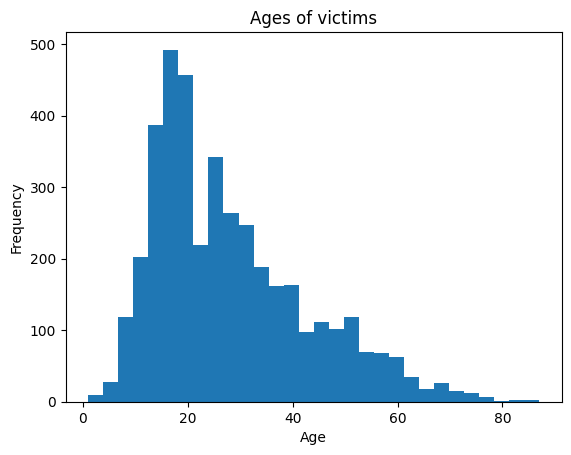

In [13]:
## 5)
shark["Age"].value_counts(dropna=False).head(15)

shark["Age_clean"] = (
    shark["Age"].astype(str)
    .str.extract(r"(\d+)")
    .astype(float)
)

shark["Age_clean"].dropna().plot(kind="hist", bins=30)
plt.xlabel("Age")
plt.title("Ages of victims")
plt.show()

In [14]:
## 6)
shark["Type"].value_counts(dropna=False).head(15)

t = shark["Type"].astype(str).str.strip().str.lower()

shark["Type_clean"] = "Unknown"
shark.loc[t == "provoked", "Type_clean"] = "Provoked"
shark.loc[t == "unprovoked", "Type_clean"] = "Unprovoked"

known = shark["Type_clean"].isin(["Provoked", "Unprovoked"])
(shark.loc[known, "Type_clean"] == "Unprovoked").mean()


np.float64(0.8902896081771721)

In [15]:
## 7)
shark["Fatal Y/N"].value_counts(dropna=False).head(15)

f = shark["Fatal Y/N"].astype(str).str.strip().str.upper()

shark["Fatal_clean"] = "Unknown"
shark.loc[f == "Y", "Fatal_clean"] = "Y"
shark.loc[f == "N", "Fatal_clean"] = "N"


In [ ]:
## 8)
subset = shark[
    shark["Type_clean"].isin(["Provoked", "Unprovoked"]) &
    shark["Fatal_clean"].isin(["Y", "N"])
]

pd.crosstab(subset["Type_clean"], subset["Fatal_clean"], normalize="index")


Fatal_clean,N,Y
Type_clean,,
Provoked,0.966929,0.033071
Unprovoked,0.753643,0.246357


Unprovoked shark attakcs are more likely to be fatal than provoked

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1) This paper is about what tidy data is and how it makes it easier to analyze data compared to messy data.

2) The tidy data snadard is meant to make data easier to work with by organizing it in a consistent manner

3) First sentence means that messy data can be basically whatever it wants to be and there is no standard, while tidy data follows rules and is structured. Second sentence means that context is important because there is nothing to generalize every single data set.

4) Values: singular pieces of data
Variables: measurables
Observations: Measurements taken

5) Each row is an is a observation, each variable is a column, and each type of data is stored in its specific table

6) Column names are values

Multiple variables are in one column

Variables appear in both rows and columns

Multiple types of data are in one table

One type of data is spread across multiple tables

Table 4 is messy becasue income level is stored as column instead of values so it is not a variable

7) Table 11 is messy becasue there are variables in rows and columns. Table 12a is molten because data was stacked and table 12b is tidy because each variable has its own column and each row is one observation

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

In [17]:
## 1)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/ForeignGifts_edu.csv")
df.head()


,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


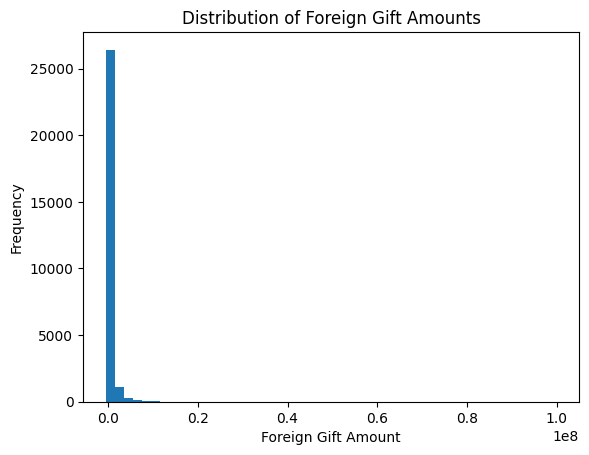

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

In [18]:
## 2)
df["Foreign Gift Amount"] = pd.to_numeric(df["Foreign Gift Amount"], errors="coerce")

plt.figure()
plt.hist(df["Foreign Gift Amount"].dropna(), bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

df["Foreign Gift Amount"].describe()


In [ ]:
## 3)
gift_type_counts = df["Gift Type"].value_counts()
gift_type_counts

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64

In [21]:
gift_type_proportions = df["Gift Type"].value_counts(normalize=True)
gift_type_proportions

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64

In [23]:
## 4)
top15_countries_count = (
    df.groupby("Country of Giftor")
      .count()["Foreign Gift Amount"]
      .sort_values(ascending=False)
      .head(15)
)

top15_countries_count

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

In [24]:
top15_countries_amount = (
    df.groupby("Country of Giftor")
      .sum(numeric_only=True)["Foreign Gift Amount"]
      .sort_values(ascending=False)
      .head(15)
)

top15_countries_amount


Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

In [26]:
## 5)
top15_institutions_amount = (
    df.groupby("Institution Name")
      .sum(numeric_only=True)["Foreign Gift Amount"]
      .sort_values(ascending=False)
      .head(15)
)

top15_institutions_amount

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

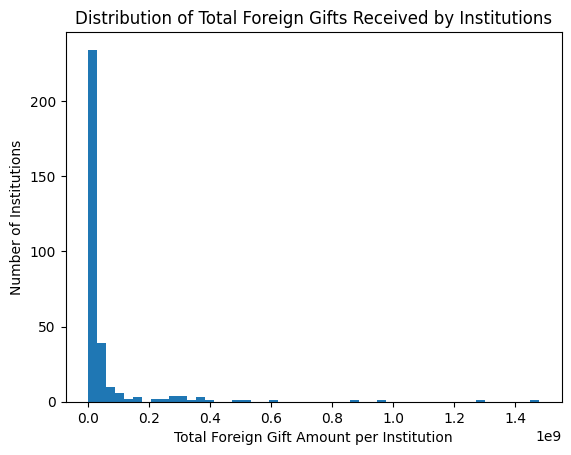

In [27]:
institution_totals = (
    df.groupby("Institution Name")
      .sum(numeric_only=True)["Foreign Gift Amount"]
)

plt.figure()
plt.hist(institution_totals.dropna(), bins=50)
plt.xlabel("Total Foreign Gift Amount per Institution")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gifts Received by Institutions")
plt.show()


In [29]:
## 6
top_giftors = (
    df.groupby("Giftor Name")
      .sum(numeric_only=True)["Foreign Gift Amount"]
      .sort_values(ascending=False)
      .head(15)
)

top_giftors

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [32]:
## 1)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/college_completion.csv")


In [33]:
## 2)
df.shape


(3798, 63)

In [34]:
df.head()


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [35]:
## 3)
pd.crosstab(df["control"], df["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


In [36]:
pd.crosstab(df["control"], df["level"], normalize="index")

level,2-year,4-year
control,,
Private for-profit,0.468750,0.531250
Private not-for-profit,0.054487,0.945513
Public,0.594352,0.405648


In [37]:
## 4)
df["grad_100_value"] = pd.to_numeric(df["grad_100_value"], errors="coerce")
df["grad_100_value"].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

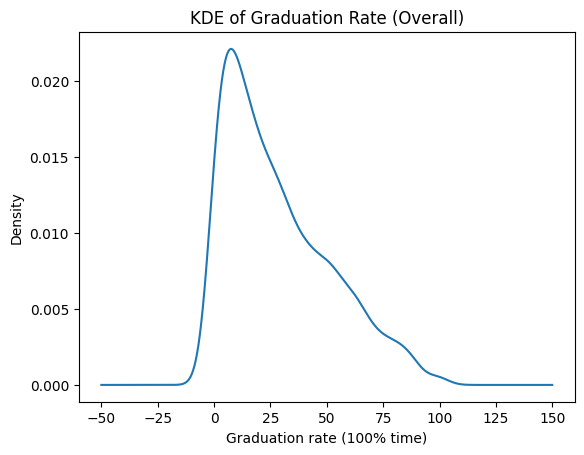

In [38]:
df["grad_100_value"].dropna().plot(kind="kde")
plt.xlabel("Graduation rate (100% time)")
plt.title("KDE of Graduation Rate (Overall)")
plt.show()

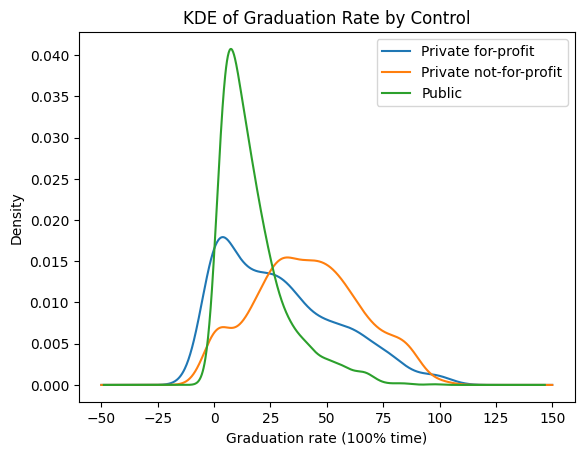

In [39]:
for control, subset in df.groupby("control"):
    subset["grad_100_value"].dropna().plot(kind="kde", label=control)

plt.xlabel("Graduation rate (100% time)")
plt.title("KDE of Graduation Rate by Control")
plt.legend()
plt.show()


In [40]:
df.groupby("control")["grad_100_value"].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


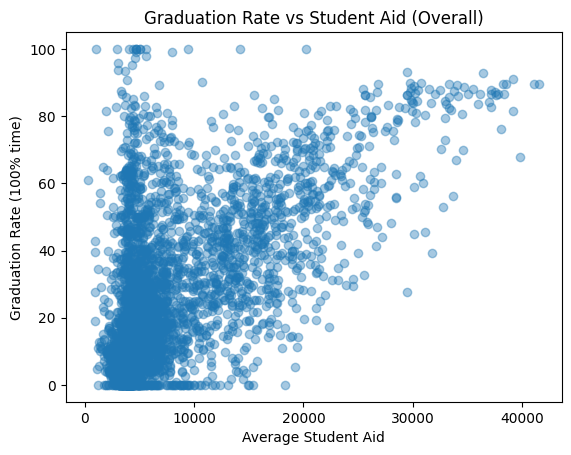

In [41]:
## 5) 
df["aid_value"] = pd.to_numeric(df["aid_value"], errors="coerce")

plt.scatter(df["aid_value"], df["grad_100_value"], alpha=0.4)
plt.xlabel("Average Student Aid")
plt.ylabel("Graduation Rate (100% time)")
plt.title("Graduation Rate vs Student Aid (Overall)")
plt.show()

In [42]:
df[["aid_value", "grad_100_value"]].dropna().cov()

,aid_value,grad_100_value
aid_value,4.358513e+07,88610.483169
grad_100_value,8.861048e+04,543.211540


In [43]:
df[["aid_value", "grad_100_value"]].dropna().corr()


,aid_value,grad_100_value
aid_value,1.000000,0.575879
grad_100_value,0.575879,1.000000


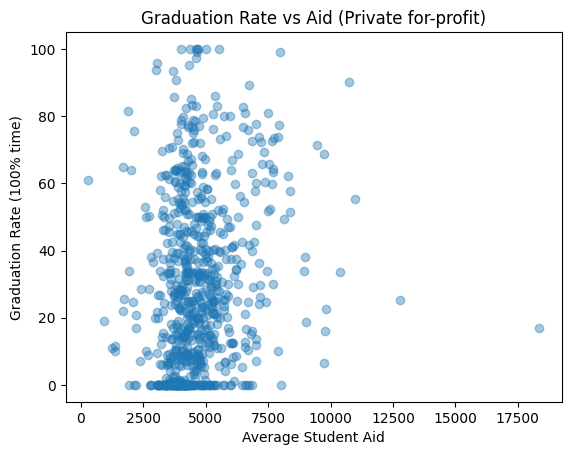

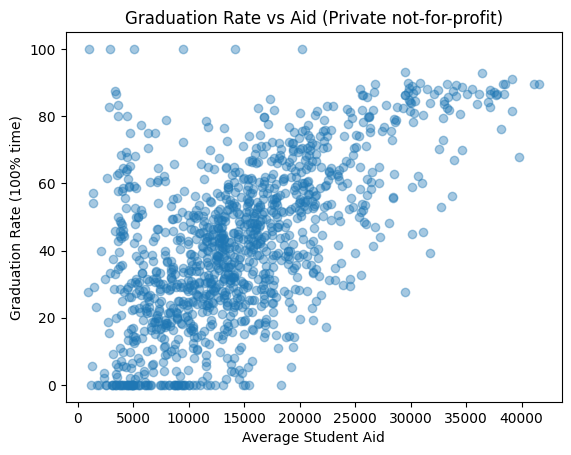

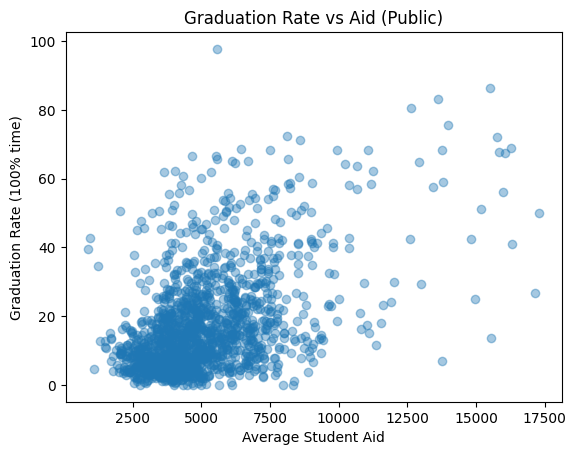

In [44]:
for control, subset in df.groupby("control"):
    plt.scatter(subset["aid_value"], subset["grad_100_value"], alpha=0.4)
    plt.xlabel("Average Student Aid")
    plt.ylabel("Graduation Rate (100% time)")
    plt.title(f"Graduation Rate vs Aid ({control})")
    plt.show()


In [46]:
for control, subset in df.groupby("control"):
    stats = subset[["aid_value", "grad_100_value"]].dropna()
    print("\n", control)
    print("Covariance:")
    print(stats.cov())
    print("Correlation:")
    print(stats.corr())



 Private for-profit
Covariance:
                   aid_value  grad_100_value
aid_value       2.048899e+06     6897.524957
grad_100_value  6.897525e+03      654.449527
Correlation:
                aid_value  grad_100_value
aid_value        1.000000        0.188363
grad_100_value   0.188363        1.000000

 Private not-for-profit
Covariance:
                   aid_value  grad_100_value
aid_value       5.948465e+07   109274.123337
grad_100_value  1.092741e+05      554.660462
Correlation:
                aid_value  grad_100_value
aid_value        1.000000        0.601591
grad_100_value   0.601591        1.000000

 Public
Covariance:
                   aid_value  grad_100_value
aid_value       4.668472e+06    15355.146212
grad_100_value  1.535515e+04      216.956489
Correlation:
                aid_value  grad_100_value
aid_value        1.000000        0.482481
grad_100_value   0.482481        1.000000


**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?